## This is an excerpt from an inventory control application built for a department store written in python scripts. 


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

In [2]:
df = pd.read_csv('inv_to_ratio.csv')

In [3]:
df.rename(columns={'Type':'product'}, inplace=True)

In [4]:
df.columns = [i.lower() for i in df.columns]

In [5]:
df.head(50)

,week,product,inv,cogs
0,1,baby sit,35,15
1,1,floor mat,30,14
2,1,trunk bag,40,8
3,2,baby sit,20,10
4,2,floor mat,16,9
5,2,trunk bag,72,5
6,3,baby sit,10,9
7,3,floor mat,7,7
8,3,trunk bag,67,9
9,4,baby sit,1,5


## Inventory Turnover Alert

In [6]:
# iterate on the column 'product'
# alert on inventory turnover ratio

inv_to_threshold = 3
bs_cogs, fm_cogs, tb_cogs = list(), list(), list()

for k,i in enumerate (df['product']):
    if df.loc[k,'product']=='baby sit':
        bs_cogs.append(df.loc[k,'cogs'])
    elif df.loc[k,'product']=='floor mat':
        fm_cogs.append(df.loc[k,'cogs'])
    elif df.loc[k,'product']=='trunk bag':
        tb_cogs.append(df.loc[k,'cogs'])
        
baby_sit_ratio = sum(bs_cogs)/np.mean([df.loc[0,'inv'],df.loc[33,'inv']])
floor_mat_ratio = sum(fm_cogs)/np.mean([df.loc[1,'inv'],df.loc[34,'inv']])
trunk_bag_ratio = sum(tb_cogs)/np.mean([df.loc[2,'inv'],df.loc[35,'inv']])

inv_ratio = pd.DataFrame({'inventory_turnover_ratio': [baby_sit_ratio, floor_mat_ratio, trunk_bag_ratio]},
                         index=['baby_sit','floor mat','trunk bag'])

for e, j in enumerate (inv_ratio['inventory_turnover_ratio']):
    if j <= inv_to_threshold :
        print(f"{inv_ratio.index[e]} has inventory turnover ratio of {j:.2f}, below benchmark of {inv_to_threshold}")
        


trunk bag has inventory turnover ratio of 2.71, below benchmark of 3


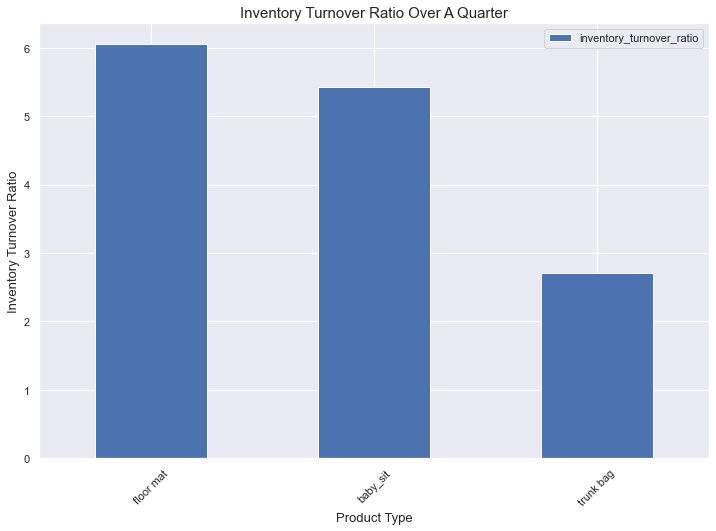

In [7]:
# display inventory turnover ratio

inv_ratio = inv_ratio.sort_values('inventory_turnover_ratio', ascending=False)
inv_ratio.plot.bar(figsize=(12,8))
plt.title('Inventory Turnover Ratio Over A Quarter', fontsize=15)
plt.xlabel('Product Type', fontsize=13)
plt.ylabel('Inventory Turnover Ratio', fontsize=13);
plt.xticks(rotation=45);

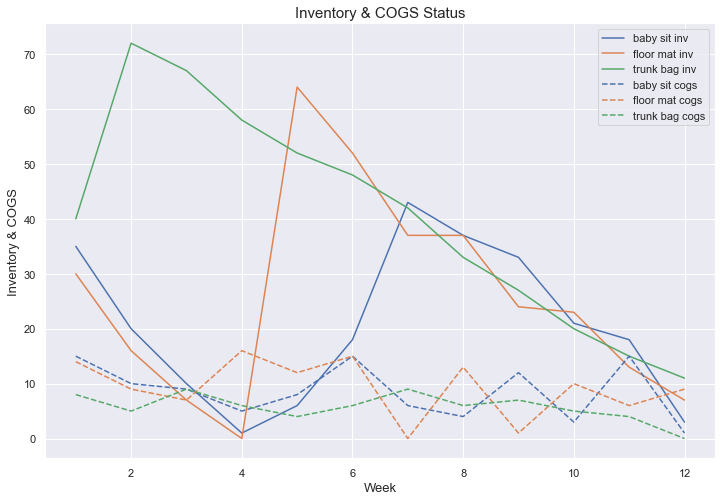

In [8]:
# inventory status

plt.figure(figsize=(12,8))

ax = sns.lineplot(data=df, x='week', y='inv', hue='product')
ax = sns.lineplot(data=df, x='week', y='cogs', hue='product', linestyle='--')

plt.legend(['baby sit inv', 'floor mat inv', 'trunk bag inv', 'baby sit cogs', 'floor mat cogs', 'trunk bag cogs'])
plt.xlabel('Week', fontsize=13)
plt.ylabel('Inventory & COGS', fontsize=13)
plt.title('Inventory & COGS Status', fontsize=15)

style = ax.get_legend()
style_line = style.get_lines()
for i in range(3,6):
    style_line[i].set_linestyle('--')